# Файлы CSV и модуль statistics


## Формат CSV
CSV (Comma-Separated Values) — это простой текстовый формат для хранения табличных данных. Каждая строка представляет собой одну запись, а значения разделяются запятыми (или другими разделителями, например ;, \t).


***Пример CSV-файла:***
```
name,age,city
Alice,30,New York
Bob,25,London
Charlie,35,Paris
```
***Особенности CSV:*** 
* Каждая строка файла представляет собой запись.
* Поля внутри записи разделяются запятыми.
* Первая строка файла часто содержит заголовки колонок.
* Поддерживает как числовые, так и текстовые данные, но все трактуются как строковый тип.


***Где используется CSV?***  
* Хранение и передача данных между системами.
* Импорт и экспорт данных в табличных редакторах (например, Excel).
* Обмен данными между различными приложениями.


***Сравнение CSV и JSON***  
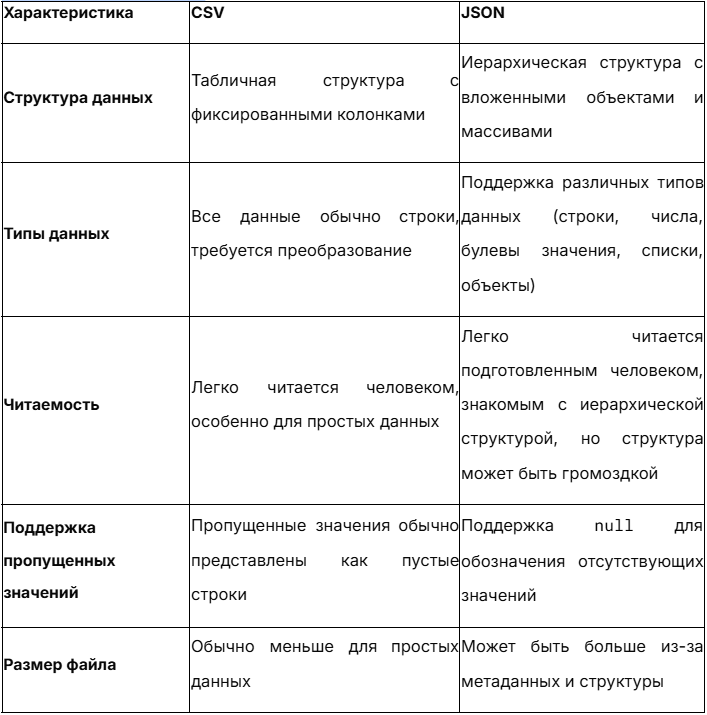
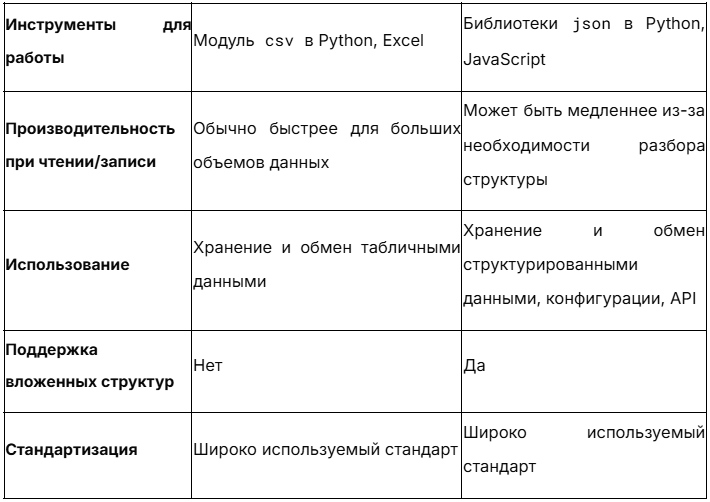

Таким образом, формат JSON более гибок и подходит для сложных структурированных данных. JSON широко используется в веб-разработке и API. А для простых табличных данных лучше подходит CSV, и он является де-факто стандартом для быстрого обмена данными между системами, которые поддерживают табличный формат.


### Работа с CSV в Python
Python поддерживает работу с CSV через встроенный модуль csv.


***Чтение CSV-файла***


In [ ]:
import csv
with open('sales.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)


Reader – специальный объект, который построчно считывает данные из файла и выдает их в виде списка строк. 


По умолчанию в формате CSV используется запятая как разделитель между данными в строке. Можно указать другой разделитель, например:  delimiter=';'.


***Запись в CSV-файл***


In [ ]:
with open('output.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['name', 'age'])
    writer.writerow(['Alice', 30])

Атрибут newline='' стоит указывать, чтобы в файле не было лишних пустых строк. 


Если у вас есть список строк (каждая строка — список или кортеж значений), можно использовать метод writerows():


In [ ]:
rows = [
    ['Alice', 30],
    ['Bob', 25],
    ['Charlie', 35]
]
with open('output.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['name', 'age'])  # заголовок
    writer.writerows(rows)            # сразу все строки

Так же можно дописать строку (или строки) в уже существующий файл: 


In [ ]:
with open('sales.csv', 'a', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Orange', 'Rainbow', '2025-07-04', '110', '2.00'])

***Работа со словарями***  
В предыдущих примерах мы считывали содержимое CSV-файла в виде списков, и строка заголовков из файла становилась просто первым из этих списков. Из-за этого терялась прямая связь между данными и названиями столбцов. Часто бывает удобно считывать данные в словарь. В этом случае заголовки столбцов станут ключами значений в каждой строке.


In [ ]:
with open('sales.csv') as f:
    reader = csv.DictReader(f)
    for row in reader:
        print(row)


Аналогично, можно записывать словари в CSV-файл: 


In [ ]:
with open('output.csv', 'w', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=['name', 'age'])
    writer.writeheader()
    writer.writerow({'age': 30, 'name': 'Alice'})


* Аргумент fieldnames обязателен: он задаёт порядок столбцов и их названия. У записываемого словаря может быть другой порядок ключей.
* `writeheader()` необходим для записи строки с заголовком. Если его не вызвать, то первая строка будет сразу данными, а не названиями столбцов.


Можно записать в файл сразу список словарей:


In [ ]:
new_persons = [
    {'name': 'David', 'age': 28}, 
    {'age': 34, 'name': 'Jane'}, 
    {'name': 'Anna', 'city': 'Berlin'}, 
    {'name': 'Martin', 'age': 20, 'city': 'London'}
]

with open('output.csv', 'a', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=['name', 'age'], extrasaction='ignore')
    writer.writerows(new_persons)


* В списке словарей new_persons у разных словарей разные ключи и их порядок.
* Открываем файл с атрибутом ‘a’, то есть новые строки будут дописаны в конце этого  файла. writeheader() не вызываем, иначе строка с заголовками будет снова записана, но не в начало файла.
* Атрибут extrasaction='ignore функции DictWriter() позволяет игнорировать лишние ключи в записываемых словарях, если их нет в списке fieldnames. Если не указать этот атрибут, то обнаружение посторонних ключей при записи словаря будет вызывать ValueError.


***Работа с пропущенными значениями***  
Пропущенные значения – это обычное явление в данных, и важно уметь их обрабатывать. В CSV-файлах пропущенные обозначаются как два разделителя подряд (обычно – две запятых подряд) или разделителем, после которого следует конец строки. При чтении такого csv-файла вы можете заменить пропуски на определенное значение или пропустить такие строки.


Пример обработки пропущенных значений: 

In [ ]:
with open('output.csv') as f:
    reader = csv.reader(f)
    good_rows = []
    for row in reader:
        # Проверяем, есть ли в строке пропущенные значения
        if any(field == '' for field in row):
            print("Пропущенные значения обнаружены, строка пропущена:", row)
            continue
        good_rows.append(row)

print("\nСтроки с полными данными:")
for row in good_rows:
    print(*row)


В этом примере мы проверяем каждую строку на наличие пустых полей и пропускаем строки с пропущенными значениями. В зависимости от задачи, вы можете заменить пропущенные значения на определенное значение по умолчанию или обработать их иным способом.


## Недостатки модуля CSV
Файлы CSV – это самый распространенный универсальный способ хранения и обмена данными. Модуль csv в Python предоставляет базовые возможности для работы с CSV-файлами, такие как чтение и запись данных, но он имеет ряд ограничений, которые требуют дополнительной обработки вручную. Вот некоторые из них:
Отсутствие обработки пропущенных значений:
* Модуль csv не предоставляет встроенных методов для автоматической замены или обработки пропущенных значений, что требует дополнительного кода для их замены или фильтрации.
* Нет поддержки различных типов данных: Все данные читаются как строки, и для преобразования их в числовые или другие типы данных необходимо выполнять дополнительные операции.
* Ограниченная обработка ошибок: При возникновении ошибок, таких как неправильный формат данных или отсутствие файла, требуется использовать блоки try-except для их обработки.
* Нет поддержки сложных структур данных: Модуль csv не поддерживает работу с вложенными структурами данных, такими как списки или словари внутри ячеек.
* Ограниченные возможности фильтрации и агрегации данных: Для выполнения сложных операций, таких как фильтрация, сортировка или агрегация данных, необходимо использовать дополнительные библиотеки или писать собственный код.
   
Изученные инструменты достаточны для базовой работы с CSV-файлами небольшого размера, но для более продвинутой работы с CSV-файлами и данными в целом рекомендуется использовать специализированные библиотеки. Например, модуль pandas предоставляет мощные инструменты для анализа данных, включая автоматическую обработку пропущенных значений, поддержку различных типов данных, удобные методы для фильтрации и агрегации, а также возможности визуализации данных. Pandas значительно упрощает работу с данными и позволяет выполнять сложные аналитические задачи с минимальными усилиями. Скоро мы приступим к его подробному изучению.


# Модуль statistics
Модуль statistics входит в стандартную библиотеку Python и используется для получения основных статистических характеристик числовых данных. Он помогает быстро проанализировать список чисел: определить "средние значения", разброс, типичные и крайние значения. Такие показатели особенно полезны при анализе данных, агрегации метрик, выявлении трендов и аномалий.


### Основные статистические функции  

***Среднее арифметическое – mean()***  
 Обычное среднее значение: сумма всех чисел, делённая на их количество.  
 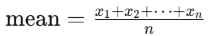​​


***Среднее геометрическое – geometric_mean()***  
 Уместно, когда усредняемые значения объединяются посредством умножения (как, например, доходности при инвестициях или инфляция)  
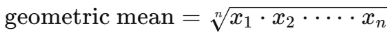

среднее геометрическое:

1.5
×
0.8
×
1.3
3
≈
1.16
(
3
  
1.5×0.8×1.3
​
 ≈1.16


***Среднее г
 моническое – harmonic_mean()***  
 Используется, когда уместнее учитывать обратные значения.  
 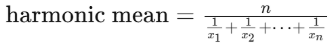

***Мода – mode()***  
Самое часто встречающееся значение в наборе данных. В случае нескольких мод — возвращает первую найденную. Для числовых и категориальных данных.  


***Медиана – median()***
 Значение, находящееся посередине отсортированного ряда. Если чисел чётное количество — берётся среднее из двух центральных. Медиана устойчива к выбросам.


***Квантиль – quantiles()***  
 Делит упорядоченные данные на равные части. Например, квартиль — это деление на 4 части:  


1-й квартиль (квантиль 25%) — значение, ниже которого лежит четверть данных


2-й квартиль — медиана


3-й квартиль (квантиль 75%) — значение, ниже которого лежит три четверти данных


***Стандартное отклонение – stdev()***   
 Показывает, насколько значения в выборке отклоняются от среднего.   
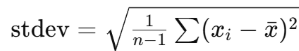


***Дисперсия – variance()***  
 Квадрат стандартного отклонения. Характеризует разброс данных относительно среднего.  
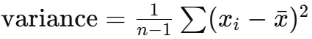


In [ ]:
import statistics

# Набор данных
data = [12, 15, 14, 10, 1, 18, 17, 15, 15, 14, 200]

# Средние значения
print("Арифметическое среднее:", statistics.mean(data))
print("Геометрическое среднее:", statistics.geometric_mean(data))
print("Гармоническое среднее:", statistics.harmonic_mean(data))

# Характеристики на отсортированном наборе
print("Отсортированный список:", sorted(data))
print("Медиана:", statistics.median(data))
print("Мода:", statistics.mode(data))


# Квантильные значения (делим на 4 части — квартиль)
print("Квартили:", statistics.quantiles(data, n=4))

# Измерения разброса
print("Стандартное отклонение:", statistics.stdev(data))
print("Дисперсия:", statistics.variance(data))


##### Вычислите основные статистические характеристики списков чисел:


In [ ]:
data1 = [12, 15, 14, 10, 1, 18, 17, 15, 15, 14, 20]
data2 = [12, 15, 14, 10, 9, 18, 17, 15, 15, 14, 20]
data3 = [12, 15, 14, 10, 9, 18, 17, 15, 15, 14, 200]


Сравните результаты по всем четырем спискам. Проанализируйте, какие значения изменились, а какие нет. Объясните почему.


# Практическое задание
1. Прочитать файл sales.csv в список словарей. Преобразовать данные к корректным типам: строки, даты, числа. Вычислить все подходящие статистические характиристики каждого столбца. 


In [ ]:
import csv
from statistics import *
from datetime import datetime

# Чтение и преобразование
with open("sales.csv") as f:
    reader = csv.DictReader(f)
    data = []
    for row in reader:
        row['Date'] = datetime.strptime(row['Date'], "%Y-%d-%m")
        row['Quantity'] = int(row['Quantity'])
        row['Price'] = float(row['Price'])
        data.append(row)

# Сбор числовых данных
quantities = [row['Quantity'] for row in data]
prices = [row['Price'] for row in data]

# Функция для вывода статистики
def describe(values, name):
    print(f"\nСтатистика для {name}:")
    print("  Среднее (mean):", mean(values))
    print("  Медиана:", median(values))
    print("  Мода:", mode(values))
    print("  Гармоническое среднее:", harmonic_mean(values))
    print("  Геометрическое среднее:", geometric_mean(values))
    print("  Стандартное отклонение:", stdev(values))
    print("  Дисперсия:", variance(values))
    print("  Квантили (Q1, Q2, Q3):", quantiles(values, n=4))

# Выводим статистику
describe(quantities, "Quantity")
describe(prices, "Price")

# Сбор остальных данных
dates = [row['Date'] for row in data]
fruits = [row['Fruit'] for row in data]
stores = [row['Store'] for row in data]

# Выводим статистику
print("\nСтатистика для Dates:")
print("  Самая частая дата:", mode(dates).strftime("%B %d, %Y"))
print("  Диапазон: от", min(dates).strftime("%B %d, %Y"), "до", max(dates).strftime("%B %d, %Y"))
print("  Дельта:", (max(dates) - min(dates)).days, "дней")

print("\nСтатистика для Fruites:")
print("  Самый популярный фрукт:", mode(fruits))

print("\nСтатистика для Store:")
print("  Самый частый магазин:", mode(stores))

2. Прочитайте файл grades.json. Запишите в csv-файл информацию по предметам Science, Math и Physics.

In [ ]:
import json
import csv

# Читаем JSON
with open('grades.json') as f:
    data = json.load(f)

# Определяем поля (ключи словаря)
fieldnames = data[0].keys()

# Фильтруем строки
data = [res for res in data if res['subject'] in ('Science', 'Math', 'Physics')]

# Записываем в CSV
with open('grades.csv', 'w', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=fieldnames)
    writer.writeheader()  # записываем заголовки
    writer.writerows(data)  # записываем все строки

print("Файл успешно записан в grades.csv")
